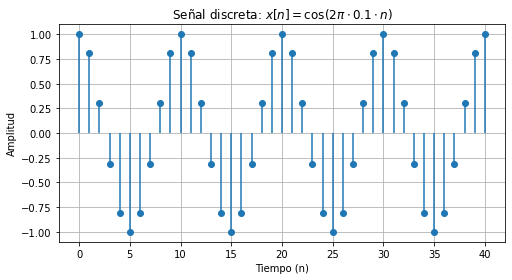

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la señal discreta
n = np.arange(0, 41)
x = np.cos(2 * np.pi * 0.1 * n)

plt.figure(figsize=(8,4))
plt.stem(n, x, basefmt=" ")
plt.title('Señal discreta: $x[n] = \cos(2\pi \cdot 0.1 \cdot n)$')
plt.xlabel('Tiempo (n)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


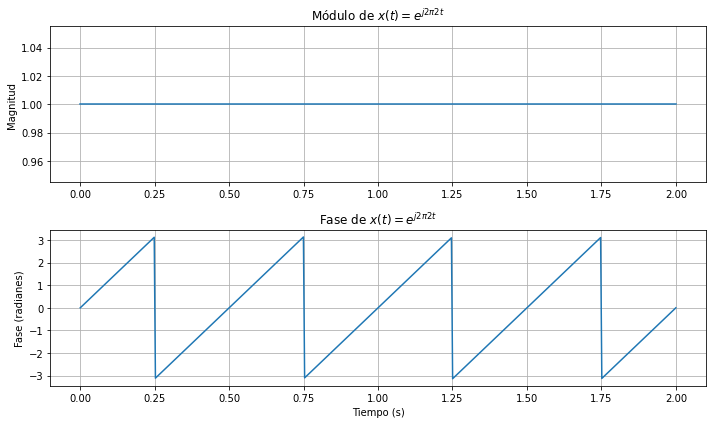

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Tiempo continuo de 0 a 2 segundos
t = np.linspace(0, 2, 500)

# Señal compleja x(t) = e^{j 2π 2 t}
x = np.exp(1j * 2 * np.pi * 2 * t)

plt.figure(figsize=(10,6))

# Módulo
plt.subplot(2,1,1)
plt.plot(t, np.abs(x))
plt.title('Módulo de $x(t) = e^{j 2\pi 2 t}$')
plt.ylabel('Magnitud')
plt.grid(True)

# Fase
plt.subplot(2,1,2)
plt.plot(t, np.angle(x))
plt.title('Fase de $x(t) = e^{j 2\pi 2 t}$')
plt.ylabel('Fase (radianes)')
plt.xlabel('Tiempo (s)')
plt.grid(True)

plt.tight_layout()
plt.show()


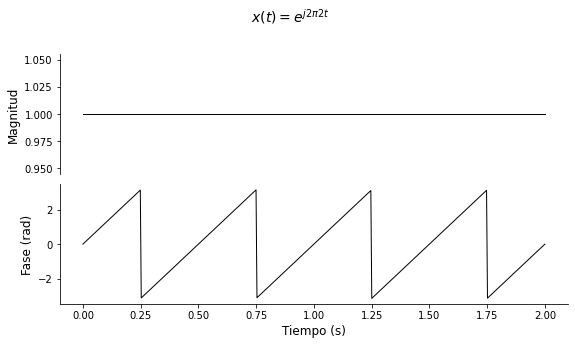

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Tiempo continuo de 0 a 2 segundos
t = np.linspace(0, 2, 500)

# Señal compleja x(t) = e^{j 2π 2 t}
x = np.exp(1j * 2 * np.pi * 2 * t)

plt.figure(figsize=(8,5))

# Módulo
ax1 = plt.subplot(2,1,1)
ax1.plot(t, np.abs(x), color='black', linewidth=1)
ax1.set_ylabel('Magnitud', fontsize=12)
ax1.set_xticks([])  # quitar ticks eje x arriba
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.grid(False)

# Fase
ax2 = plt.subplot(2,1,2)
ax2.plot(t, np.angle(x), color='black', linewidth=1)
ax2.set_ylabel('Fase (rad)', fontsize=12)
ax2.set_xlabel('Tiempo (s)', fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)

# Ajustar títulos y espaciado
plt.suptitle(r'$x(t) = e^{j 2\pi 2 t}$', fontsize=14, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt

class SignalPlotter:
    def __init__(self, signal_func, t_range, signal_name='x(t)', discrete=False, complex_signal=False):
        self.signal_func = signal_func
        self.t = t_range
        self.signal_name = signal_name
        self.discrete = discrete
        self.complex_signal = complex_signal

    def _setup_axes_crossed(self, ax):
        # Posicionar ejes cruzados en (0,0)
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')

        # Ocultar otros bordes
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        # Poner ticks en ambos lados del eje
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')

        # Añadir flechas en los extremos de los ejes
        # Dibujamos flechas manualmente con annotate
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        hw = 0.02*(ymax - ymin)  # head width
        hl = 0.04*(xmax - xmin)  # head length
        lw = 1.0  # linewidth
        ohg = 0.3  # overhang

        # Flecha eje x (al final)
        ax.annotate('', xy=(xmax, 0), xytext=(xmin, 0),
                    arrowprops=dict(arrowstyle='-|>', linewidth=lw, color='black'))

        # Flecha eje y (al final)
        ax.annotate('', xy=(0, ymax), xytext=(0, ymin),
                    arrowprops=dict(arrowstyle='-|>', linewidth=lw, color='black'))

    def plot(self):
        y = self.signal_func(self.t)

        plt.figure(figsize=(8,5))

        if self.complex_signal:
            ax1 = plt.subplot(2,1,1)
            ax1.plot(self.t, np.abs(y), color='black', linewidth=1)
            ax1.set_ylabel('Magnitud', fontsize=12)
            self._setup_axes_crossed(ax1)
            ax1.grid(False)

            ax2 = plt.subplot(2,1,2)
            ax2.plot(self.t, np.angle(y), color='black', linewidth=1)
            ax2.set_ylabel('Fase (rad)', fontsize=12)
            ax2.set_xlabel('Tiempo', fontsize=12)
            self._setup_axes_crossed(ax2)
            ax2.grid(False)

            plt.suptitle(self.signal_name, fontsize=14, y=0.95)
            plt.tight_layout(rect=[0, 0, 1, 0.93])

        else:
            ax = plt.gca()
            if self.discrete:
                markerline, stemlines, baseline = ax.stem(self.t, y, basefmt=" ")
                plt.setp(markerline, color='black')
                plt.setp(stemlines, color='black')
            else:
                ax.plot(self.t, y, color='black', linewidth=1)

            ax.set_xlabel('Tiempo', fontsize=12)
            ax.set_ylabel('Amplitud', fontsize=12)
            self._setup_axes_crossed(ax)
            ax.grid(False)

            plt.title(self.signal_name, fontsize=14, pad=20)

        plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_20932\85290904.py:63: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.93])


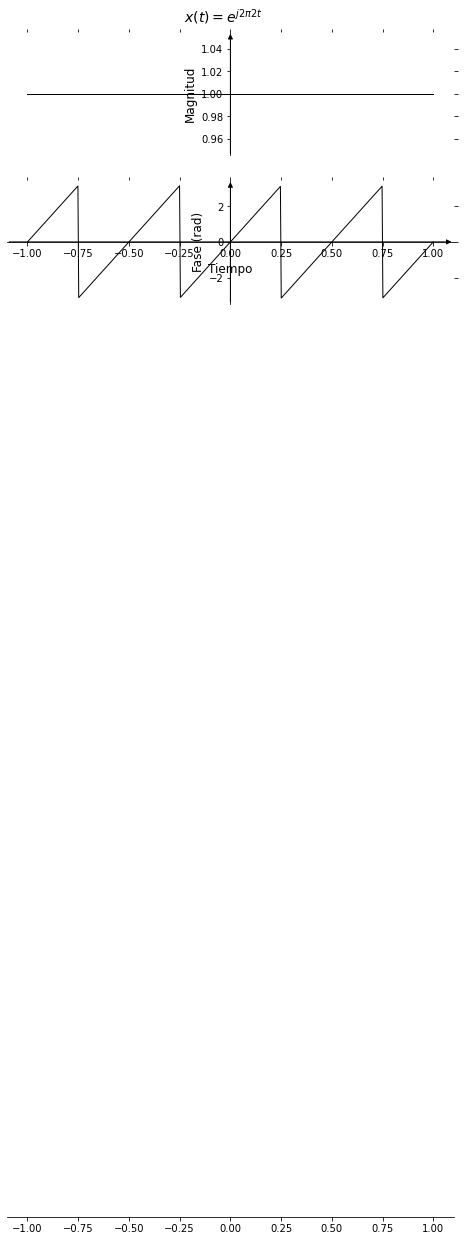

In [15]:
t = np.linspace(-1, 1, 500)
signal_func = lambda t: np.exp(1j * 2 * np.pi * 2 * t)
plotter = SignalPlotter(signal_func, t, signal_name=r'$x(t) = e^{j 2\pi 2 t}$', complex_signal=True)
plotter.plot()


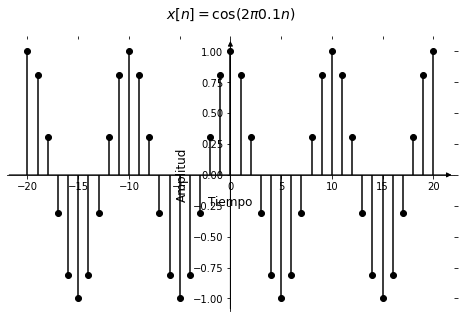

In [16]:
import numpy as np

n = np.arange(-20, 21)  # valores negativos y positivos
signal_func = lambda n: np.cos(2 * np.pi * 0.1 * n)
plotter = SignalPlotter(signal_func, n, signal_name=r'$x[n] = \cos(2\pi 0.1 n)$', discrete=True)
plotter.plot()


In [17]:
import numpy as np
import matplotlib.pyplot as plt

class SignalPlotter:
    def __init__(self, signal_func, t_range, signal_name='x(t)', discrete=False, complex_signal=False,
                 show_deltas=False, period=None, num_periods=3):
        """
        period: float o int, periodo de la señal para mostrar múltiples ciclos (se repite en t)
        num_periods: cuántos periodos mostrar (antes y después del cero para señales continuas)
        show_deltas: True para dibujar deltas discretos (flechas)
        """
        self.signal_func = signal_func
        self.t = t_range
        self.signal_name = signal_name
        self.discrete = discrete
        self.complex_signal = complex_signal
        self.show_deltas = show_deltas
        self.period = period
        self.num_periods = num_periods

    def _setup_axes_crossed(self, ax):
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')

        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        lw = 1.0

        ax.annotate('', xy=(xmax, 0), xytext=(xmin, 0),
                    arrowprops=dict(arrowstyle='-|>', linewidth=lw, color='black'))

        ax.annotate('', xy=(0, ymax), xytext=(0, ymin),
                    arrowprops=dict(arrowstyle='-|>', linewidth=lw, color='black'))

    def _plot_deltas(self, ax, t, y):
        # Dibujar flechas verticales desde 0 a y[n] en posiciones t
        for ti, yi in zip(t, y):
            if np.abs(yi) > 1e-12:
                ax.annotate('', xy=(ti, yi), xytext=(ti, 0),
                            arrowprops=dict(facecolor='black', shrink=0, width=1.5, headwidth=6))

    def _repeat_periodic(self, t, y):
        if self.period is None:
            return t, y
        else:
            # Para señales continuas o discretas
            t_extended = []
            y_extended = []
            for k in range(-self.num_periods, self.num_periods + 1):
                t_shifted = t + k * self.period
                t_extended.append(t_shifted)
                y_extended.append(y)
            return np.concatenate(t_extended), np.concatenate(y_extended)

    def plot(self):
        y = self.signal_func(self.t)

        # Repetir periodos si aplica
        if self.period is not None:
            self.t, y = self._repeat_periodic(self.t, y)

        plt.figure(figsize=(8,5))

        if self.complex_signal:
            ax1 = plt.subplot(2,1,1)
            ax1.plot(self.t, np.abs(y), color='black', linewidth=1)
            ax1.set_ylabel('Magnitud', fontsize=12)
            self._setup_axes_crossed(ax1)
            ax1.grid(False)

            ax2 = plt.subplot(2,1,2)
            ax2.plot(self.t, np.angle(y), color='black', linewidth=1)
            ax2.set_ylabel('Fase (rad)', fontsize=12)
            ax2.set_xlabel('Tiempo', fontsize=12)
            self._setup_axes_crossed(ax2)
            ax2.grid(False)

            plt.suptitle(self.signal_name, fontsize=14, y=0.95)
            plt.tight_layout(rect=[0, 0, 1, 0.93])

        else:
            ax = plt.gca()

            if self.discrete:
                # Si deltas, dibujamos con flechas
                if self.show_deltas:
                    ax.plot(self.t, np.zeros_like(self.t), 'k', lw=1)  # baseline en cero
                    self._plot_deltas(ax, self.t, y)
                else:
                    markerline, stemlines, baseline = ax.stem(self.t, y, basefmt=" ")
                    plt.setp(markerline, color='black')
                    plt.setp(stemlines, color='black')
            else:
                ax.plot(self.t, y, color='black', linewidth=1)

            ax.set_xlabel('Tiempo', fontsize=12)
            ax.set_ylabel('Amplitud', fontsize=12)
            self._setup_axes_crossed(ax)
            ax.grid(False)

            plt.title(self.signal_name, fontsize=14, pad=20)

        plt.show()


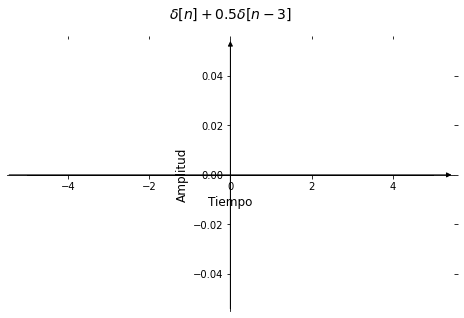

In [18]:
n = np.arange(-5, 6)
def delta_signal(n):
    y = np.zeros_like(n, dtype=float)
    y[n==0] = 1.0  # delta en n=0
    y[n==3] = 0.5  # otro delta
    return y

plotter = SignalPlotter(delta_signal, n, signal_name=r'$\delta[n] + 0.5 \delta[n-3]$', discrete=True, show_deltas=True)
plotter.plot()


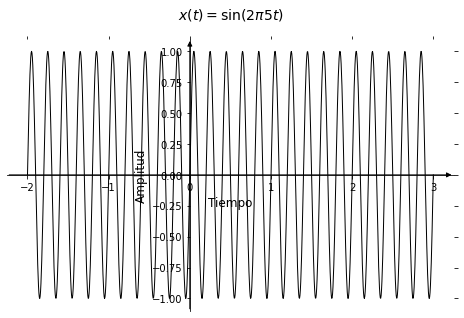

In [27]:
t = np.linspace(0, 1, 200)
signal_func = lambda t: np.sin(2 * np.pi * 5 * t)  # 5 Hz

plotter = SignalPlotter(signal_func, t, signal_name=r'$x(t) = \sin(2\pi 5 t)$',
                        discrete=False, period=1, num_periods=2)
plotter.plot()


In [28]:
import numpy as np
import matplotlib.pyplot as plt

class MultiSignalPlotter:
    def __init__(self, t_range, xlabel='Tiempo'):
        self.t = t_range
        self.signals = []
        self.xlabel = xlabel

    def add_signal(self, signal_func, label=None, discrete=False, complex_signal=False,
                   color='black', linestyle='-', show_deltas=False, period=None, num_periods=3):
        self.signals.append({
            'func': signal_func,
            'label': label,
            'discrete': discrete,
            'complex_signal': complex_signal,
            'color': color,
            'linestyle': linestyle,
            'show_deltas': show_deltas,
            'period': period,
            'num_periods': num_periods
        })

    def _setup_axes_crossed(self, ax):
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')

        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        lw = 1.0

        ax.annotate('', xy=(xmax, 0), xytext=(xmin, 0),
                    arrowprops=dict(arrowstyle='-|>', linewidth=lw, color='black'))
        ax.annotate('', xy=(0, ymax), xytext=(0, ymin),
                    arrowprops=dict(arrowstyle='-|>', linewidth=lw, color='black'))

    def _plot_deltas(self, ax, t, y, color):
        for ti, yi in zip(t, y):
            if np.abs(yi) > 1e-12:
                ax.annotate('', xy=(ti, yi), xytext=(ti, 0),
                            arrowprops=dict(facecolor=color, shrink=0, width=1.5, headwidth=6))

    def _repeat_periodic(self, t, y, period, num_periods):
        if period is None:
            return t, y
        t_extended = []
        y_extended = []
        for k in range(-num_periods, num_periods + 1):
            t_shifted = t + k * period
            t_extended.append(t_shifted)
            y_extended.append(y)
        return np.concatenate(t_extended), np.concatenate(y_extended)

    def plot(self, title=None, figsize=(10,6), save_path=None):
        plt.figure(figsize=figsize)
        ax = plt.gca()

        any_complex = any(sig['complex_signal'] for sig in self.signals)
        if any_complex:
            # Para múltiples señales complejas, dividimos en módulo y fase
            fig, axs = plt.subplots(2, 1, figsize=figsize, sharex=True)
            for sig in self.signals:
                t, y = self.t, sig['func'](self.t)
                if sig['period'] is not None:
                    t, y = self._repeat_periodic(t, y, sig['period'], sig['num_periods'])
                if sig['complex_signal']:
                    axs[0].plot(t, np.abs(y), label=sig['label'], color=sig['color'], linestyle=sig['linestyle'])
                    axs[1].plot(t, np.angle(y), label=sig['label'], color=sig['color'], linestyle=sig['linestyle'])
                else:
                    # Si no es compleja, la dibujamos solo en magnitud como real
                    axs[0].plot(t, y.real, label=sig['label'], color=sig['color'], linestyle=sig['linestyle'])

            for ax in axs:
                self._setup_axes_crossed(ax)
                ax.grid(False)
            axs[0].set_ylabel('Magnitud', fontsize=12)
            axs[1].set_ylabel('Fase (rad)', fontsize=12)
            axs[1].set_xlabel(self.xlabel, fontsize=12)
            if title is not None:
                plt.suptitle(title, fontsize=16, y=0.95)
            axs[0].legend()
            axs[1].legend()
        else:
            # Señales reales
            for sig in self.signals:
                t, y = self.t, sig['func'](self.t)
                if sig['period'] is not None:
                    t, y = self._repeat_periodic(t, y, sig['period'], sig['num_periods'])

                if sig['discrete']:
                    if sig['show_deltas']:
                        ax.plot(t, np.zeros_like(t), color='black', lw=1)  # baseline
                        self._plot_deltas(ax, t, y, sig['color'])
                    else:
                        markerline, stemlines, baseline = ax.stem(t, y, basefmt=" ", label=sig['label'])
                        plt.setp(markerline, color=sig['color'])
                        plt.setp(stemlines, color=sig['color'])
                else:
                    ax.plot(t, y, label=sig['label'], color=sig['color'], linestyle=sig['linestyle'])

            ax.set_xlabel(self.xlabel, fontsize=12)
            ax.set_ylabel('Amplitud', fontsize=12)
            self._setup_axes_crossed(ax)
            ax.grid(False)
            if title is not None:
                plt.title(title, fontsize=16, pad=20)
            ax.legend()

        plt.tight_layout()

        if save_path is not None:
            plt.savefig(save_path, dpi=300)
        plt.show()


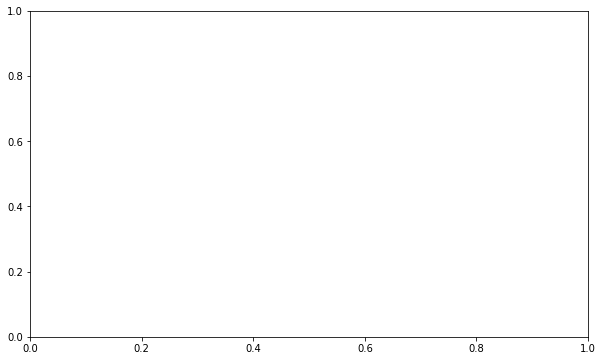

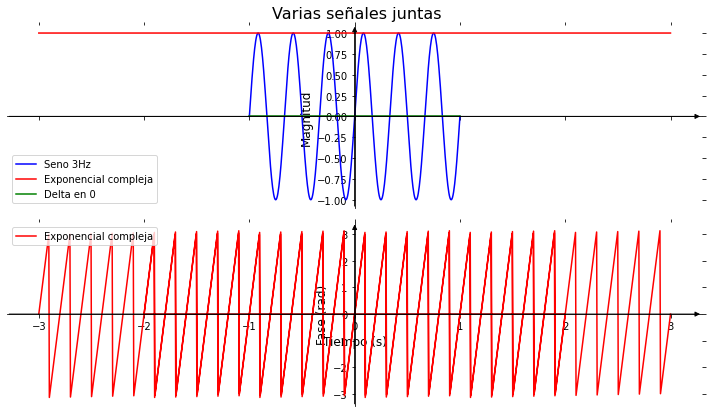

In [29]:
import numpy as np

t = np.linspace(-1, 1, 400)
n = np.arange(-10, 11)

def x1(t): return np.sin(2 * np.pi * 3 * t)
def x2(t): return np.exp(1j * 2 * np.pi * 5 * t)
def x3(n): 
    y = np.zeros_like(n, dtype=float)
    y[n==0] = 1
    return y

plotter = MultiSignalPlotter(t_range=t, xlabel='Tiempo (s)')
plotter.add_signal(x1, label='Seno 3Hz', discrete=False, color='blue')
plotter.add_signal(x2, label='Exponencial compleja', discrete=False, complex_signal=True, color='red', period=1, num_periods=2)
plotter.add_signal(x3, label='Delta en 0', discrete=True, show_deltas=True, color='green')

plotter.plot(title='Varias señales juntas', save_path='senal_multiples.png')


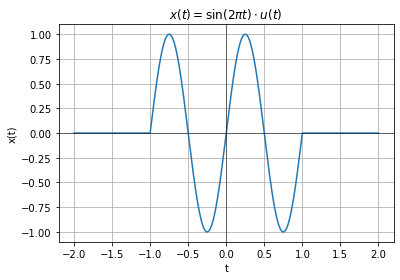

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. Variable simbólica
t = sp.symbols('t')

# 2. Definir señal simbólicamente
x = sp.sin(2 * sp.pi * t) * (sp.Heaviside(t+1)-sp.Heaviside(t-1))

# 3. Convertir a función NumPy evaluable
x_func = sp.lambdify(t, x, modules=['numpy'])

# 4. Evaluar y graficar
t_vals = np.linspace(-2, 2, 1000)
x_vals = x_func(t_vals)

plt.plot(t_vals, x_vals)
plt.title(r'$x(t) = \sin(2\pi t) \cdot u(t)$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


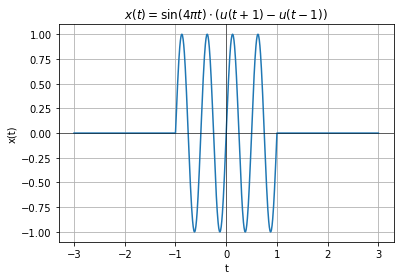

In [17]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.parsing.sympy_parser import parse_expr, standard_transformations, implicit_multiplication_application

# 1. Definir variable simbólica
t = sp.symbols('t')

# 2. Definir funciones necesarias
u = sp.Heaviside  # Alias para Heaviside

# 3. Habilitar transformaciones útiles para parsing (como multiplicación implícita)
transformations = (standard_transformations + (implicit_multiplication_application,))

# 4. Cadena de texto que representa la señal
expr_str = "sin(4 * pi * t) * (u(t + 1) - u(t - 1))"

# 5. Parsear la cadena a expresión simbólica
local_dict = {'u': u, 'pi': sp.pi, 't': t, 'sin': sp.sin}
expr = parse_expr(expr_str, local_dict=local_dict, transformations=transformations)

# 6. Convertir a función NumPy
f = sp.lambdify(t, expr, modules=["numpy"])

# 7. Evaluar y graficar
t_vals = np.linspace(-3, 3, 1000)
x_vals = f(t_vals)

plt.plot(t_vals, x_vals)
plt.title(r'$x(t) = \sin(4\pi t)\cdot (u(t+1)-u(t-1))$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()

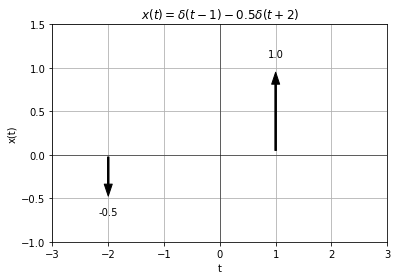

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Ubicaciones y alturas de los deltas
impulse_times = np.array([1, -2])
amplitudes = np.array([1, -0.5])

# Ejes y límites
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-3, 3)
plt.ylim(-1, 1.5)
plt.grid(True)

# Dibujar impulsos
for t_val, amp in zip(impulse_times, amplitudes):
    plt.annotate('', xy=(t_val, amp), xytext=(t_val, 0),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
    plt.text(t_val, amp + 0.1*np.sign(amp), f'{amp}', ha='center', va='bottom' if amp > 0 else 'top')

# Títulos y etiquetas
plt.title(r'$x(t) = \delta(t - 1) - 0.5 \delta(t + 2)$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()


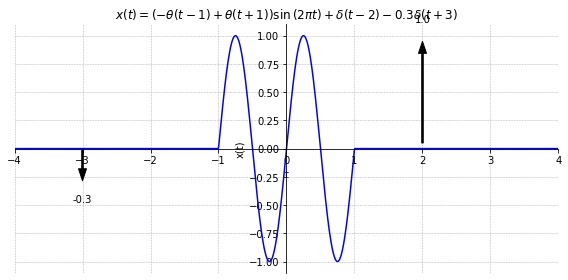

In [19]:
class SignalPlotter:
    def __init__(self, expr_str, var='t', time_range=(-5, 5), num_points=1000):
        self.var_name = var
        self.t = sp.symbols(var)
        self.time_range = time_range
        self.num_points = num_points

        # Diccionario de funciones conocidas
        self.local_dict = {
            'u': sp.Heaviside,
            'delta': sp.DiracDelta,
            'DiracDelta': sp.DiracDelta,
            'Heaviside': sp.Heaviside,
            'pi': sp.pi,
            var: self.t,
            'sin': sp.sin,
            'cos': sp.cos,
            'exp': sp.exp
        }

        # Transformaciones para permitir multiplicación implícita
        transformations = standard_transformations + (implicit_multiplication_application,)

        # Parsear la expresión
        self.expr = parse_expr(expr_str, local_dict=self.local_dict, transformations=transformations)

    def _extract_impulses(self):
        impulse_locs = []
        impulse_amps = []
        expr_terms = self.expr.as_ordered_terms()

        for term in expr_terms:
            deltas = term.atoms(sp.DiracDelta)
            if deltas:
                for d in deltas:
                    arg = d.args[0]
                    roots = sp.solve(arg, self.t)
                    amp = term.coeff(d)
                    if roots:
                        impulse_locs.append(float(roots[0]))
                        impulse_amps.append(float(amp))
        return impulse_locs, impulse_amps

    def _remove_dirac_terms(self):
        return self.expr.replace(lambda expr: expr.has(sp.DiracDelta), lambda _: 0)

    def plot(self):
        fig, ax = plt.subplots(figsize=(8, 4))
        t_vals = np.linspace(self.time_range[0], self.time_range[1], self.num_points)

        # Extraer impulsos y eliminar deltas para graficar parte continua
        impulse_locs, impulse_amps = self._extract_impulses()
        expr_cont = self._remove_dirac_terms()

        # Dibujar parte continua
        func = sp.lambdify(self.t, expr_cont, modules=["numpy"])
        try:
            y_vals = func(t_vals)
            ax.plot(t_vals, y_vals, label='Parte continua', color='blue')
        except Exception:
            pass  # No hay parte continua o error de evaluación

        # Dibujar deltas
        for t0, amp in zip(impulse_locs, impulse_amps):
            ax.annotate('', xy=(t0, amp), xytext=(t0, 0),
                        arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
            ax.text(t0, amp + 0.1*np.sign(amp), f'{amp}', ha='center',
                    va='bottom' if amp > 0 else 'top', fontsize=10)

        # Estilo Oppenheim
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.set_xlabel(self.var_name)
        ax.set_ylabel('x(' + self.var_name + ')')
        ax.set_xlim(self.time_range)
        ax.set_title(f'$x({self.var_name}) = {sp.latex(self.expr)}$')

        plt.tight_layout()
        plt.show()


# Ejemplo de uso: mezcla de senoide acotada y delta
plotter = SignalPlotter("sin(2*pi*t)*(u(t+1)-u(t-1)) + delta(t-2) - 0.3*delta(t+3)", time_range=(-4, 4))
plotter.plot()


ValueError: zero-size array to reduction operation minimum which has no identity

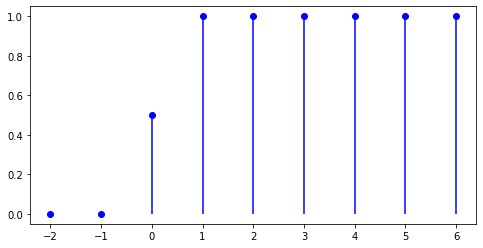

In [26]:
import re

# Ajuste para interpretar delta(t) como KroneckerDelta(t, 0) en modo discreto
class SignalPlotter:
    def __init__(self, expr_str, var='t', time_range=(-5, 5), num_points=1000, discrete=False):
        self.var_name = var
        self.t = sp.symbols(var, real=True)
        self.time_range = time_range
        self.num_points = num_points
        self.discrete = discrete

        # Reemplazo manual en modo discreto: delta(x) => KroneckerDelta(x, 0)
        if discrete:
            expr_str = expr_str.replace("delta(", "KroneckerDelta(")
            expr_str = re.sub(r'KroneckerDelta\(([^,()\n]+?)\)', r'KroneckerDelta(\1, 0)', expr_str)

        self.local_dict = {
            'u': sp.Heaviside,
            'delta': sp.DiracDelta if not discrete else sp.KroneckerDelta,
            'DiracDelta': sp.DiracDelta,
            'KroneckerDelta': sp.KroneckerDelta,
            'Heaviside': sp.Heaviside,
            'pi': sp.pi,
            var: self.t,
            'sin': sp.sin,
            'cos': sp.cos,
            'exp': sp.exp
        }

        transformations = standard_transformations + (implicit_multiplication_application,)
        self.expr = parse_expr(expr_str, local_dict=self.local_dict, transformations=transformations)

    def _extract_impulses(self):
        impulse_locs = []
        impulse_amps = []
        expr_terms = self.expr.as_ordered_terms()

        for term in expr_terms:
            impulses = term.atoms(sp.DiracDelta if not self.discrete else sp.KroneckerDelta)
            for imp in impulses:
                if isinstance(imp, sp.DiracDelta):
                    arg = imp.args[0]
                    root = sp.solve(arg, self.t)
                    if root:
                        impulse_locs.append(float(root[0]))
                        impulse_amps.append(float(term.coeff(imp)))
                elif isinstance(imp, sp.KroneckerDelta):
                    loc = imp.args[0] if isinstance(imp.args[1], sp.Number) and imp.args[1] == 0 else imp.args[1]
                    try:
                        impulse_locs.append(int(loc))
                        impulse_amps.append(float(term.coeff(imp)))
                    except Exception:
                        pass
        return impulse_locs, impulse_amps

    def _remove_impulse_terms(self):
        return self.expr.replace(lambda expr: expr.has(sp.DiracDelta) or expr.has(sp.KroneckerDelta), lambda _: 0)

    def plot(self):
        fig, ax = plt.subplots(figsize=(8, 4))

        if self.discrete:
            n_vals = np.arange(self.time_range[0], self.time_range[1] + 1)
            expr_cont = self._remove_impulse_terms()
            func = sp.lambdify(self.t, expr_cont, modules=["numpy"])
            y_vals = func(n_vals)
            ax.stem(n_vals, y_vals, basefmt=" ", linefmt='blue', markerfmt='bo')

            # Impulsos discretos (Kronecker)
            impulse_locs, impulse_amps = self._extract_impulses()
            ax.stem(impulse_locs, impulse_amps, basefmt=" ", linefmt='black', markerfmt='ko')

        else:
            t_vals = np.linspace(self.time_range[0], self.time_range[1], self.num_points)
            expr_cont = self._remove_impulse_terms()
            func = sp.lambdify(self.t, expr_cont, modules=["numpy"])
            try:
                y_vals = func(t_vals)
                ax.plot(t_vals, y_vals, label='Parte continua', color='blue')
            except Exception:
                pass

            impulse_locs, impulse_amps = self._extract_impulses()
            for t0, amp in zip(impulse_locs, impulse_amps):
                ax.annotate('', xy=(t0, amp), xytext=(t0, 0),
                            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
                ax.text(t0, amp + 0.1*np.sign(amp), f'{amp}', ha='center',
                        va='bottom' if amp > 0 else 'top', fontsize=10)

        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.set_xlabel(self.var_name)
        ax.set_ylabel('x(' + self.var_name + ')')
        ax.set_xlim(self.time_range)
        ax.set_title(f'$x({self.var_name}) = {sp.latex(self.expr)}$')

        plt.tight_layout()
        plt.show()


# Ejemplo: señal discreta usando KroneckerDelta con entrada tipo texto "delta"
plotter = SignalPlotter("delta(t) - 0.5*delta(t-1) + u(t)", time_range=(-2, 6), discrete=True)
plotter.plot()
